# Ex.9

In [1]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [5]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 0.5

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_cls = LinearSVC(loss='hinge', C=C, dual=True, random_state=42).fit(X_scaled, y)
svc_cls = SVC(kernel='linear', C=C).fit(X_scaled, y)
sgd_cls = SGDClassifier(alpha=alpha, random_state=42).fit(X_scaled, y)

In [61]:
def get_line(model):
    weight = -model.coef_[0, 0]/model.coef_[0, 1]
    bias = -model.intercept_[0]/model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * weight + bias], [10, 10 * weight + bias]])

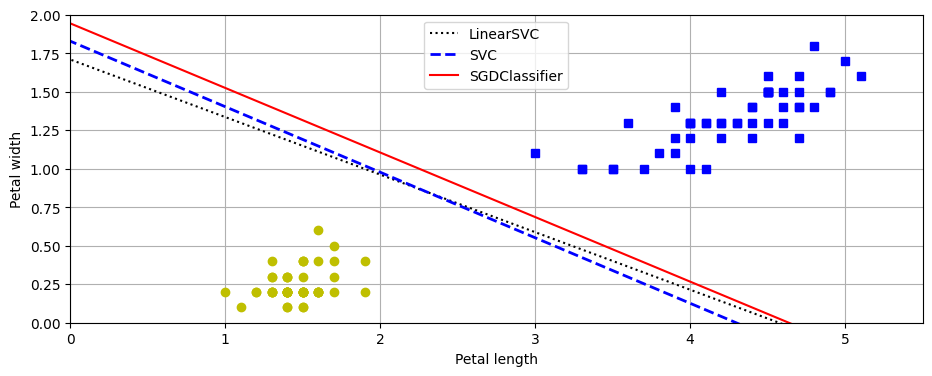

In [60]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

lin_line = get_line(lin_cls)
svc_line = get_line(svc_cls)
sgd_line = get_line(sgd_cls)

plt.figure(figsize=(11, 4))
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

# Ex.10

In [62]:
wine  = datasets.load_wine(as_frame=True)

In [66]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=42)

In [71]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
122,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0


In [73]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lin_clf = make_pipeline(StandardScaler(), LinearSVC(dual='auto', random_state=42))
lin_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual='auto', random_state=42))])

In [74]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf, X_train, y_train).mean()

0.9774928774928775

In [75]:
lin_clf.score(X_test, y_test)

0.9777777777777777

In [76]:
svc_clf = make_pipeline(StandardScaler(), SVC()) # kernel='linear', C=C
svc_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [79]:
cross_val_score(svc_clf, X_train, y_train).mean()

0.9698005698005698

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

param_distrib = {
    "svc__gamma": loguniform(0.001, 0.1),
    "svc__C": uniform(1, 10),
}
rnd_search_cv = RandomizedSearchCV(svc_clf, param_distrib, n_iter=100, cv=5,
                                   random_state=42)
rnd_search_cv.fit(X_train, y_train)
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=9.925589984899778, gamma=0.011986281799901188))])

In [91]:
rnd_search_cv.best_score_

0.9925925925925926

In [92]:
rnd_search_cv.score(X_test, y_test)

0.9777777777777777

# Ex.11

In [109]:
housing = datasets.fetch_california_housing()

In [110]:
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)

In [114]:
from sklearn.svm import LinearSVR

lin_svr = make_pipeline(StandardScaler(), LinearSVR(max_iter=10000, dual=True, random_state=42))
lin_svr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, max_iter=10000, random_state=42))])

In [120]:
from sklearn.metrics import root_mean_squared_error

y_pred = lin_svr.predict(X_train)
rmse = root_mean_squared_error(y_train, y_pred)
rmse

0.8674069403544904

In [126]:
from sklearn.svm import SVR

svm_reg = make_pipeline(StandardScaler(), SVR())
# svr_reg.fit(X_train, y_train)

In [131]:
from scipy.stats import loguniform, uniform

param_distrib = {
    "svr__gamma": loguniform(0.001, 0.1),
    "svr__C": uniform(1, 10),
}
rnd_search_cv = RandomizedSearchCV(svm_reg, param_distrib, n_iter=100, cv=5, random_state=42)
rnd_search_cv.fit(X_train[:2000], y_train[:2000])

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())]),
                   n_iter=100,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000022A0E3257C0>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000022A0E4945E0>},
                   random_state=42)

In [132]:
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=4.63629602379294, gamma=0.08781408196485979))])

In [133]:
-cross_val_score(rnd_search_cv.best_estimator_, X_train, y_train,
                 scoring="neg_root_mean_squared_error")

array([0.60628288, 0.58521665, 0.5760779 , 0.57309699, 0.60537574])

In [134]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train)
rmse = root_mean_squared_error(y_train, y_pred)
rmse

0.5982856945870129